# Unit 1 Project : Group #12 Final Submission




*Member Names* :
>**Betania Kassahun, Charlie Myungchul Jung, Ishani Saha, Jeffrey Robert Hullinger II, Naeema Qureshi, Samia Ahmed, Shray Kiran Shah**


# **[Q2] IF Model (Renewed)**

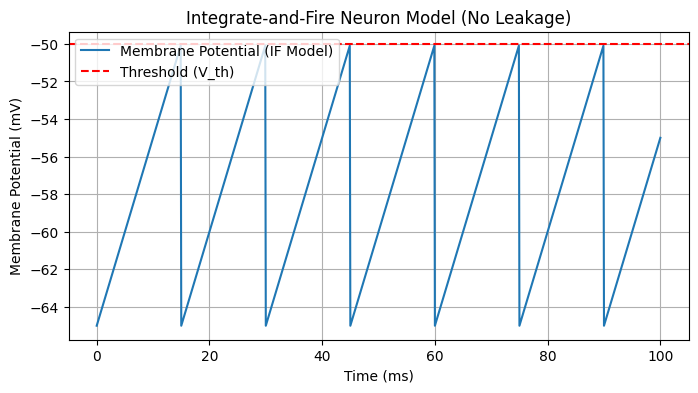

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # time step (ms)
T = 100   # total simulation time (ms)
time = np.arange(0, T + dt, dt)

# IF model parameters
R_m = 1.0     # membrane resistance (MΩ)
V_th = -50.0  # spike threshold (mV)
V_reset = -65.0  # reset potential (mV)
V_rest = -65.0   # resting potential (mV)
tau_m = 20.0  # membrane time constant (ms)

# Input current
I = 20.0  # Strong input current (nA)

# Initialize membrane potential
V_IF = np.full_like(time, V_rest)

# Simulation loop for IF model (no leakage)
for t in range(1, len(time)):
    dV = (R_m * I) / tau_m * dt  # No leak term
    V_IF[t] = V_IF[t-1] + dV
    if V_IF[t] >= V_th:
        V_IF[t] = V_reset  # Reset after spike

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(time, V_IF, label="Membrane Potential (IF Model)")
plt.axhline(V_th, color='r', linestyle='--', label="Threshold (V_th)")
plt.title('Integrate-and-Fire Neuron Model')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()


#**[Q5] Inhibitory Inputs to IF Model**

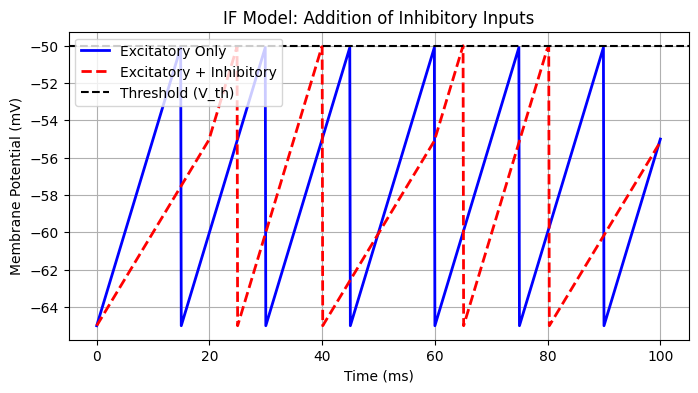

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 100   # Total simulation time (ms)
time = np.arange(0, T + dt, dt)

# IF model parameters
R_m = 1.0     # Membrane resistance (MΩ)
V_th = -50.0  # Spike threshold (mV)
V_reset = -65.0  # Reset potential (mV)
V_rest = -65.0   # Resting potential (mV)
tau_m = 20.0  # Membrane time constant (ms)

# Input currents
I_exc = 20.0  # Excitatory input current (nA)
I_inh = np.zeros_like(time)  # Inhibitory current

# Apply consistent, periodic inhibitory influence from the start
inhibitory_intervals = np.arange(0, len(time), 400)  # Apply every 400 time steps
for start in inhibitory_intervals:
    I_inh[start:start + 200] = -10.0  # Consistent inhibition windows

# Initialize membrane potentials
V_exc = np.full_like(time, V_rest)  # Excitatory-only case
V_combined = np.full_like(time, V_rest)  # Excitatory + Inhibitory case

# Simulation loop
for t in range(1, len(time)):
    # Excitatory-only case
    dV_exc = (R_m * I_exc) / tau_m * dt
    V_exc[t] = V_exc[t-1] + dV_exc
    if V_exc[t] >= V_th:
        V_exc[t] = V_reset  # Reset after spike

    # Excitatory + Inhibitory case (consistent inhibition)
    dV_combined = (R_m * (I_exc + I_inh[t])) / tau_m * dt
    V_combined[t] = V_combined[t-1] + dV_combined
    if V_combined[t] >= V_th:
        V_combined[t] = V_reset  # Reset after spike

# Plot results
plt.figure(figsize=(8, 4))
plt.plot(time, V_exc, label="Excitatory Only", color="blue", linewidth=2)
plt.plot(time, V_combined, label="Excitatory + Inhibitory", color="red", linestyle="dashed", linewidth=2)
plt.axhline(V_th, color='black', linestyle='--', label="Threshold (V_th)", linewidth=1.5)

plt.title('IF Model: Addition of Inhibitory Inputs')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()


In Code 2, an inhibitory current (I_inh) is introduced and combined with the excitatory current (I_exc). The current occurs every 400 steps and reduces the membrane potential during those intervals, preventing it from reaching the threshold as quickly as the only excitatory input does. The neuron spikes less frequently due to this. It also delays the membrane potential slowing the rise to threshold. This is reflected in the graph by the larger slope of the red line when it is rising.

# **[Q2] LIF Model**

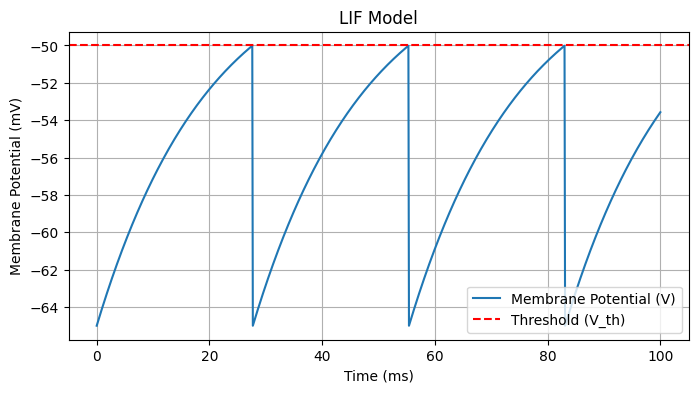

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # time step (ms)
T = 100   # total simulation time (ms)
time = np.arange(0, T + dt, dt)

# LIF model parameters
tau_m = 20.0  # membrane time constant (ms)
R_m = 1.0     # membrane resistance (MΩ)
V_th = -50.0  # spike threshold (mV)
V_reset = -65.0  # reset potential (mV)
V_rest = -65.0   # resting potential (mV)

# Significantly increasing input current to ensure threshold crossing
I = 20.0  # Stronger input current (nA)

# Re-initialize membrane potential
V = np.full_like(time, V_rest)

# Simulation loop
for t in range(1, len(time)):
    dV = (-(V[t-1] - V_rest) + R_m * I) / tau_m * dt
    V[t] = V[t-1] + dV
    if V[t] >= V_th:
        V[t] = V_reset  # reset after spike

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(time, V, label="Membrane Potential (V)")
plt.axhline(V_th, color='r', linestyle='--', label="Threshold (V_th)")
plt.title('LIF Model')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()

# **[Q4] Bursting Inputs to LIF Model**

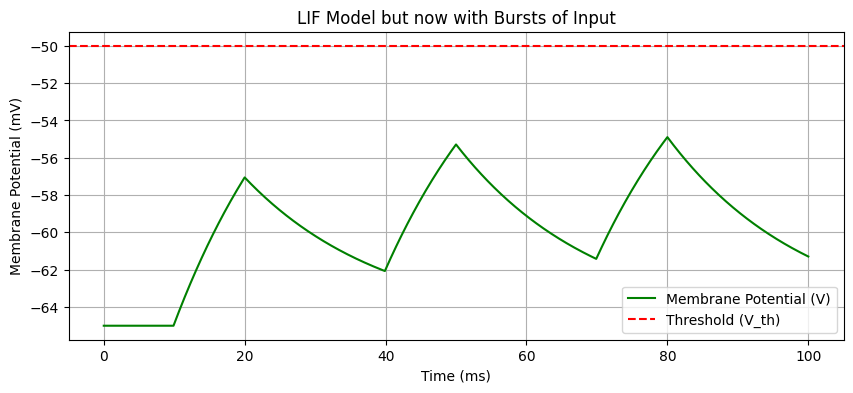

In [ ]:
#For Burst (NAEEMA)
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 100   # Total simulation time (ms)
time = np.arange(0, T + dt, dt)

# LIF model parameters
tau_m = 20.0  # Membrane time constant (ms)
R_m = 1.0     # Membrane resistance (MΩ)
V_th = -50.0  # Spike threshold (mV)
V_reset = -65.0  # Reset potential (mV)
V_rest = -65.0   # Resting potential (mV)

# Generating burst input current
I = np.zeros_like(time)
burst_intervals = [(10, 20), (40, 50), (70, 80)]  # Burst periods (start, end)

for start, end in burst_intervals:
    I[(time >= start) & (time <= end)] = 20.0  # Apply current during bursts

# Initialize membrane potential
V = np.full_like(time, V_rest)

# Simulation loop
for t in range(1, len(time)):
    dV = (-(V[t-1] - V_rest) + R_m * I[t]) / tau_m * dt
    V[t] = V[t-1] + dV
    if V[t] >= V_th:
        V[t] = V_reset  # Reset after spike

# Plot only the membrane potential
plt.figure(figsize=(10, 4))
plt.plot(time, V, color='g', label="Membrane Potential (V)")
plt.axhline(V_th, color='r', linestyle='--', label="Threshold (V_th)")
plt.ylabel('Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.title('LIF Model but now with Bursts of Input')
plt.legend()
plt.grid(True)

plt.show()

- The input current was changed from constant input ("I = 20.0") to bursts at 20-30 ms and 50-60 ms ("I = np.zeros_like(time); burst_intervals = [(10, 20), (40, 50), (70, 80)]"). Outside of these bursts the input current was 0 nA, indicating the neuron has returned to rest. By changing the input current from always being equal to 20 we were able to visualize a different pattern, where input was being applied in increments.

- The membrane potential code was also changed from "dV = (-(V[t-1] - V_rest) + R_m * I) / tau_m * dt" to "dV = (-(V[t-1] - V_rest) + R_m * I[t]) / tau_m * dt". The first equation was dependent on a constant input. By adding I[t] the neuron will only receive input during a brut period versus always being active.This was seen in the shift of spikes on the second plot.

# **[Q2] Simple Open-Loop Neural Network**

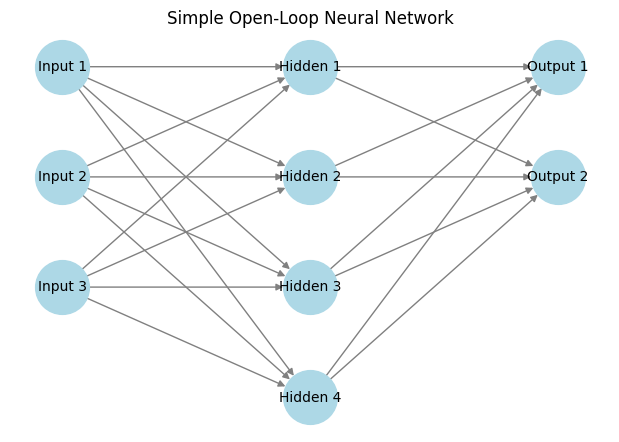

Network Output: [0.60680408 0.50063423]


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define a simple feedforward neural network with one hidden layer
class SimpleNeuralNetwork:
    def __init__(self, input_size=3, hidden_size=4, output_size=2):
        # Randomly initialize weights
        self.W1 = np.random.randn(hidden_size, input_size)  # Input to Hidden
        self.W2 = np.random.randn(output_size, hidden_size)  # Hidden to Output

    def forward(self, X):
        # Simple forward pass (ReLU activation for hidden, Sigmoid for output)
        self.hidden = np.maximum(0, np.dot(self.W1, X))  # ReLU activation
        self.output = 1 / (1 + np.exp(-np.dot(self.W2, self.hidden)))  # Sigmoid
        return self.output

# Create a visualization function for the open-loop neural network
def visualize_network(input_size, hidden_size, output_size):
    G = nx.DiGraph()  # Directed graph (open-loop structure)

    # Adding nodes
    input_nodes = [f'Input {i+1}' for i in range(input_size)]
    hidden_nodes = [f'Hidden {i+1}' for i in range(hidden_size)]
    output_nodes = [f'Output {i+1}' for i in range(output_size)]

    # Create graph structure
    for i in input_nodes:
        for j in hidden_nodes:
            G.add_edge(i, j)  # Input to Hidden

    for j in hidden_nodes:
        for k in output_nodes:
            G.add_edge(j, k)  # Hidden to Output

    # Positioning
    pos = {**{n: (0, -i) for i, n in enumerate(input_nodes)},
           **{n: (1, -i) for i, n in enumerate(hidden_nodes)},
           **{n: (2, -i) for i, n in enumerate(output_nodes)}}

    # Draw the network
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', edge_color='gray', font_size=10)
    plt.title("Simple Open-Loop Neural Network")
    plt.show()

# Initialize and visualize the network
nn = SimpleNeuralNetwork(input_size=3, hidden_size=4, output_size=2)
visualize_network(input_size=3, hidden_size=4, output_size=2)

# Example input
X_example = np.array([0.5, 0.1, -0.2])
output = nn.forward(X_example)
print("Network Output:", output)


Coincidence detection is a neuronal strategy that plays a key role in how many organisms like humans can hear sound. Coincidence detection occurs by which a circuit can detect

#**[Q3]**

**IF Model**:A mathematical model describing how neurons respond to stimuli. It includes two components: an equation that describes the membrane potential and a spike generator. If the desired membrane potential is reached the a spike will be generated. The model uses bits of information as its final output generator ( 0 = do not fire or 1 = fire an AP). One key benefit of the IF model is its computational efficiency, making it ideal for large-scale simulations of neuronal networks. It also is useful for studying fundamental neural dynamics and interactions in a computationally inexpensive manner. Its limitations include oversimplifying the behavior of neurons as it ignores natural passive decay of membrane potential and lacks a mechanism for graded responses. It also does not take into account the variations in ionic conductance or refractory periods. In terms of how they compare to real neurons, the IF model has an instant reset after reaching threshold which is unlike biological neurons that gradually integrate inputs and decay over time. The IF model lacks leakage currents and the ability to propagate action potentials without an external spike generator.


**Leaky Intergrate and Fire Neuron Model (LIF)**
The LIF is a mathematical model of a neuron displays the stimulation of neuron, similarly to the I&F model. However, it incorporates leaky ion channels which depict the natural decay of membrane potential following the action potential threshold being reached. A significant benefit of the LIF model is that it more accurately reflects biological neurons by accounting for leakage currents, allowing for gradual decrease in membrane potential compared to an abrupt reset. Additionally, a limitation of the model is that it can't propogate AP and needs a spike generator to reach threshold by use of an electrochemical gradient. The LIF model lacks components of real neurons such as voltage-gated ion channels, refractory periods, and synaptic plasticity. It also does not fully replicate the propagation of action potentials. It resets the voltage artificially instead of natural repolarization like biological neurons.

**Hodgkin-Huxley (HH) model**
The closest mathematical model of a neuron employs voltage gate sodium and potassium channels to display neural activation and propogation of action poetntial in addition to the features displayed in the LIF model. It is the first model to incorporate a method of propogating action potential with the use of the ion channels to reach threshold. A key advantage of the HH model is its high biological accuracy as it explicitly models the ionic conductances that underlie neural excitability, providing a more realistic simulation of the generation of action potentials, a crucial feature of real neurons. As a limitation, HH models treat every part of the neuron the same in terms of function despite them being different biologically. It is also computationally expensive as it requires the solution of multiple different equations and is unrealistic for computing for large neural networks.

**Simple Neural Network**
As a subset of a very broad umbrella term of Artificial Intelligence, a neural network typically includes a number of nodes interconnected in layers in which it processes and transfers information. Especially for a 'simple' neural network, it only consists of three layers: 1 input, 1 hidden layer, and 1 output. One key advantage of these neural networks against machine learning includes the lack of manual extraction of input features, as the network can do so automatically! A limitation of this model is that it cannot compute very complex problems due to its minimal number of layers. It also requires large amounts of data and computational power and is prone to overfitting. In addition, it lacks feedback mechanisms present in real brains. Artificial neural networks do not have synaptic plasticity, real time neurotransmitter signaling, or dynamic interactions with other brain regions.

The central difference between the models involve their complexity. The Hodgkin-Huxley (HH) model is most complex because it incorporates how ion channels (such as sodium and potassium) influence the neuron's membrane potential while propagating an action potential. All Leaky Integrated and Fire (LIF), simple neuronal model, and the Integrated and Fire Model (IF) models use an artificial spike generator to push the neuronal model to a threshold to generate the action potential biologically inaccurate to a typical neuron. Additionally, the difference between the IF model v. LIF and HH models is that the latter two incorporate the leakage of current, altering the membrane potential before and after the action potential through its natural passive decay in the membrane potential. On the other hand, the former holds an instant reset to the baseline resting potential. Based on the computational models of IF and LIF, we were able to detect within the code that there is an additional decay term in the LIF model (dV = (-(V[t-1] - V_rest) + R_m * I) / tau_m * dt), which isn't incorporated in the IF model and enhances the complexity and the also the number bits incorporated. Additionally, the IF model only has a simple update step, which resets the voltage to resting potential immediately after reaching the threshold.

On the other hand, IF model would be considered more concise as it has a simple update term that can be contrasted to the LIF model with its decay term that takes longer time to process. Lastly, the number of bits is higher in the LIF than the IF because there are more states at which the neuron reaches resting compared to the auto reset in the IF, which demonstrates this is higher entropy in the LIF compared to the IF.




# **[Q6] Coincidence Detection for Sound**

**Overview**

Coincidence detection is a neural mechanism which is used by the brain to process sound localization. It allows neurons to fire only when two signals arrive at the same time, and this allows for determining the direction of a sound. This process occurs in the medial superior olive (MSO). The MSO is a structure in the brainstem that detects interaural time differences (ITD) which are the tiny time delays between when a sound reaches each ear.

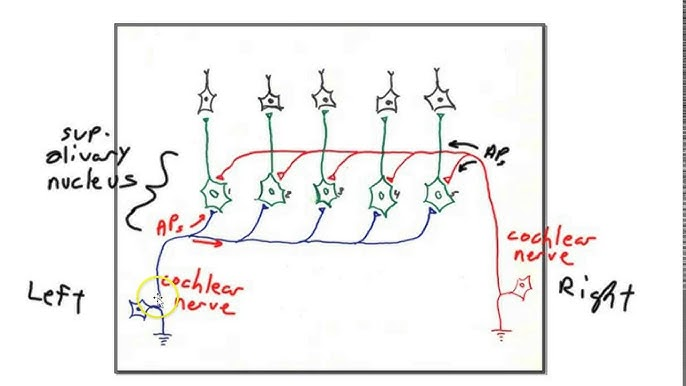

**Mechanism Example:**

Assuming that the conduction velocities are equivalent, if a sound is picked up by the right ear first, it will travel down the cochlear nerve as an action potential to the left. However, if the left ear picks up on the same sound a later (due to the sound reaching the left side later as the sound was localized on the right side) it will also fire an action potential down the left cochlear nerve. However, because this action potential fires later it will not have as much time to travel and thus will not travel as far as the right cochlear nerve action potential. Therefore because they both have to meet at the same neuron the neuron in the superior olivary nucleus will be closer to the left side. This is how sound is localized in the neuronal system of humans and other animals.


**Neural Basis of Coincidence Detector**


The integrate-and-fire (IF) and leaky integrate-and-fire (LIF) neuron models act as a computational framework that helps us better understand coincidence detection. These two models describe how neurons accumulate inputs over time and how they fire when their membrane potential reaches a threshold.

**IF Model:** Basic neurons integrate incoming signals without decay and the neuron fires if the signals from both ears arrive simultaneously.

**LIF Model:** Neurons have a leakage in membrane potential which makes precise timing very important for successful signal integration.

**Application in MSO:** The MSO relies on neurons acting as coincidence detectors as they respond only when auditory inputs from both ears are received in sync.


**Jeffress Model**

The Jeffress Model (Jeffress 1948) is a good explanation of coincidence detection in sound localization. The model proposes that neurons in the MSO receive input from delay lines which are axons that are various different lengths and create time delays to align signals from both ears. The direction of the sound source can be determined when two signals arrive at a neuron at the same time causing it to fire to its maximum level.

**Excitation and Inhibition**

In our LIF model with inhibition, bursts of input were put in at specific time intervals. MSO neurons similarly receive both excitatory and inhibitory signals and fine tune their ability to detect coincident inputs. The presence of inhibition prevents neurons from firing in response to random, non coincident inputs which thus improves the accuracy in sound localization

**Network Representation**
A feedforward neural network such as the one we developed in this project can be adapted to represent MSO processing.
Input Layer: Represents signals arriving from left and right ears
Hidden Layer (MSO Neurons): Performs coincidence detection based on input timing
Output Layer: Indicates perceived location of sound source

**AI Applications**

Certain sound detection systems such as Alexa can use coincidence detection. They can localize a sound by comparing the difference in times for a sound to hit one of the microphones compared to a different microphone on another side much like two human ears. Signals showing when these microphones are activated are fed to a hidden layer for further processing and localization.

**Zoology Applications**

Barn owls have a much more advanced and more accurate sound coincidence detection system than humans. This auditory system is able to distinguish differences of a sound between each ear much more efficiently. This highly accurate sound localization allows for owls to locate a mouse’s location in less than a second. Bats also rely on coincidence detection by first emitting ultrasonic pulses and when these pulses reflect back as echoes bats can determine prey direction and distance by differences between left and right ear. Similarly, insects like crickets can also use sound localization for locating mates by listening to mating calls. These insects  have a specific neural tract dedicated for this coincidence detection.
